In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle, Circle
from matplotlib import colors, cm
import os

os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/LshCas13a_d10LVM/")

In [2]:
lysT_TCS_df = pd.read_csv("Results/Tables/Picture_source_tables/Ecd10LVM_lysT_TCS_raw.tsv", sep="\t")
rrsH_TCS_df = pd.read_csv("Results/Tables/Picture_source_tables/Ecd10LVM_rrsH_TCS_raw.tsv", sep="\t")

In [3]:
def draw_t_nt_barplot_nc(tcs_df, T_columns, NT_columns, t_subplot, nt_subplot, invisible_subplot, label, f, nt_scale, xlabel):
    def SEM(x):
        return(np.std(x, ddof=1)/np.sqrt(len(x)))
   
    t_mean = tcs_df[T_columns].apply(lambda x: np.mean(x), axis=1).tolist()
    t_std = tcs_df[T_columns].apply(lambda x: np.std(x, ddof=1), axis=1).tolist()
    
    nt_mean = tcs_df[NT_columns].apply(lambda x: np.mean(x), axis=1).tolist()
    nt_std = tcs_df[NT_columns].apply(lambda x: np.std(x, ddof=1), axis=1).tolist()
    
    vmax = max(tcs_df[T_columns + NT_columns].apply(max, axis=1))
    
    title_font_size=30    
    
    ylim = (0, max([np.sum(x) for x in zip(t_mean, t_std)] + [np.sum(x) for x in zip(nt_mean, nt_std)] + [vmax])*1.05)
    
    for i, row in tcs_df.iterrows():
        
        t_subplot.bar(x = row["Pos"],
                      height = np.mean(row[T_columns]),
                      align = "center",
                      yerr = SEM(row[T_columns]), 
                      error_kw=dict(lw=1, capsize=5, capthick=1),
                      edgecolor="black", 
                      color="red",
                      linewidth=0.5)
        t_subplot.plot(np.repeat(row["Pos"], len(T_columns)), 
                       row[T_columns], 
                       marker="o", 
                       linestyle="None",
                       color="black", 
                       markersize=4)
        
        nt_subplot.bar(x = row["Pos"],
                      height = np.mean(row[NT_columns]),
                      align = "center",
                      yerr = SEM(row[NT_columns]), 
                      error_kw=dict(lw=1, capsize=5, capthick=1),
                      edgecolor="black", 
                      color="grey",
                      linewidth=0.5)
        nt_subplot.plot(np.repeat(row["Pos"], len(NT_columns)), 
                        row[NT_columns], 
                        marker="o", 
                        linestyle="None",
                        color="black", 
                        markersize=4)
    
    for subplot in (t_subplot, nt_subplot):
        subplot.spines['top'].set_visible(False)
        subplot.spines['right'].set_visible(False)
        subplot.spines['top'].set_visible(False)
        subplot.spines['right'].set_visible(False)
        subplot.tick_params(axis="x", labelsize=20)
        subplot.tick_params(axis="y", labelsize=20)
    
    t_subplot.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    t_subplot.set_ylabel("T", size=title_font_size, weight="bold")
    nt_subplot.set_ylabel("NT", size=title_font_size, weight="bold")
    nt_subplot.set_xlabel(xlabel, size=title_font_size)
    
    nt_subplot.set_xticks(tcs_df["Pos"].tolist()[0::f])
    nt_subplot.set_xticklabels([str(x) for x in tcs_df["Pos"].tolist()[0::f]])
    
    t_subplot.set_ylim(ylim)
    nt_subplot.set_ylim((0, ylim[1]/nt_scale))
    #nt_subplot.set_ylim(ylim)
    
    invisible_subplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    invisible_subplot.set_ylabel("5' ends coverage, CPM", size=title_font_size, labelpad=60)
    #invisible_subplot.set_title(label, size=15, loc='left')
    invisible_subplot.set_title(label, 
                                size=title_font_size, 
                                weight="bold",
                                position=(0.01, 0.95), horizontalalignment='left', 
                                transform=invisible_subplot.transAxes)
    
    return(ylim)

In [4]:
def draw_tRNA_AC_loop(plot, a, b, R, r, colors_array, labels_array=[], letters_array=[]):
    def get_x_coord(a, R, t):
        return(a + R*np.cos(t))

    def get_y_coord(b, R, t):
        return(b + R*np.sin(t))
    
    shift = np.pi/9
    angles_array = [x+shift for x in np.linspace(np.pi/2, 2.5*np.pi, 10)][0:-1]

    x_coords = [get_x_coord(a, R, t=x) for x in angles_array]
    y_coords = [get_y_coord(b, R, t=x) for x in angles_array]
    coords_array = [(x, y) for x, y in zip(x_coords, y_coords)]

    for i, coord in enumerate(coords_array):
        circle = Circle(coord, edgecolor="black", radius=r, facecolor=colors_array[1:-1][i])
        plot.add_patch(circle)

    alpha = np.arcsin(r/R)
    L = 2*R*np.sin(alpha/2)

    for i in range(len(angles_array)-1):
        x1 = get_x_coord(a, R, t=angles_array[i]+alpha)
        y1 = get_y_coord(b, R, t=angles_array[i]+alpha)

        x2 = get_x_coord(a, R, t=angles_array[i+1]-alpha)
        y2 = get_y_coord(b, R, t=angles_array[i+1]-alpha)

        plot.plot((x1, x2), (y1, y2), color="black")

    left_stem_nc_x = x_coords[0]
    left_stem_nc_y = y_coords[0] + 2*r + L

    right_stem_nc_x = x_coords[8]
    right_stem_nc_y = y_coords[8] + 2*r + L

    left_stem_nc_cirle = Circle((left_stem_nc_x, left_stem_nc_y), facecolor=colors_array[0], edgecolor="black", radius=r)
    right_stem_nc_circle = Circle((right_stem_nc_x, right_stem_nc_y), facecolor=colors_array[-1], edgecolor="black", radius=r)

    plot.add_patch(left_stem_nc_cirle)
    plot.add_patch(right_stem_nc_circle)

    left_stem_edge_x1 = x_coords[0]
    left_stem_edge_x2 = x_coords[0]
    left_stem_edge_y1 = y_coords[0] + r
    left_stem_edge_y2 = y_coords[0] + r + L

    right_stem_edge_x1 = x_coords[8]
    right_stem_edge_x2 = x_coords[8]
    right_stem_edge_y1 = y_coords[8] + r
    right_stem_edge_y2 = y_coords[8] + r + L

    plot.plot((left_stem_edge_x1, left_stem_edge_x2), (left_stem_edge_y1, left_stem_edge_y2), color="black")
    plot.plot((right_stem_edge_x1, right_stem_edge_x2), (right_stem_edge_y1, right_stem_edge_y2), color="black")
    
    label_shift = r*3
    
    label_font = 18
    label_kwargs={"ha" : "center", "va" : "center"}
    
    if len(labels_array) > 0:
        left_label_x = left_stem_nc_x - r - label_shift
        left_label_y = left_stem_nc_y
        
        right_label_x = right_stem_nc_x + r + label_shift
        right_label_y = right_stem_nc_y
        
        plot.annotate(labels_array[0], 
                      (left_label_x, left_label_y), 
                      size=label_font, annotation_clip=False, 
                      **label_kwargs)
        plot.annotate(labels_array[-1], 
                      (right_label_x, right_label_y), 
                      size=label_font, annotation_clip=False, 
                      **label_kwargs)
        
        label_x_coords = [get_x_coord(a, R+r+label_shift, t=x) for x in angles_array]
        label_y_coords = [get_y_coord(b, R+r+label_shift, t=x) for x in angles_array]
        label_coords_array = [(x, y) for x, y in zip(label_x_coords, label_y_coords)]
        
        for i, coord in enumerate(label_coords_array):
            label_angle = 0
            _kwargs = {"ha" : "center", "va" : "center", "rotation" : label_angle}
            plot.annotate(labels_array[1:-1][i], coord, size=label_font, annotation_clip=False, **_kwargs)
    
    label_letter_shift = r*1.001
    letter_font = 18
    
    if len(letters_array) > 0:
        left_letter_x = left_stem_nc_x - r - label_letter_shift
        left_letter_y = left_stem_nc_y
        
        right_letter_x = right_stem_nc_x + r + label_letter_shift
        right_letter_y = right_stem_nc_y
        
        plot.annotate(letters_array[0], 
                      (left_letter_x, left_letter_y), 
                      size=letter_font, annotation_clip=False, **label_kwargs)
        plot.annotate(letters_array[-1], 
                      (right_letter_x, right_letter_y), 
                      size=letter_font, annotation_clip=False, **label_kwargs)
        
        letter_x_coords = [get_x_coord(a, R+r+label_letter_shift, t=x) for x in angles_array]
        letter_y_coords = [get_y_coord(b, R+r+label_letter_shift, t=x) for x in angles_array]
        
        fl_offset = 15*np.pi/180
        letter_cycle_first_x = get_x_coord(a, R+r+label_letter_shift, t=angles_array[0]+fl_offset)
        letter_cycle_first_y = get_y_coord(b, R+r+label_letter_shift, t=angles_array[0]+fl_offset)
        
        letter_cycle_last_x = get_x_coord(a, R+r+label_letter_shift, t=angles_array[-1]-fl_offset)
        letter_cycle_last_y = get_y_coord(b, R+r+label_letter_shift, t=angles_array[-1]-fl_offset)
        
        letter_coords_array = [(x, y) for x, y in zip(letter_x_coords, letter_y_coords)]
        letter_coords_array[0] = (letter_cycle_first_x, letter_cycle_first_y)
        letter_coords_array[-1] = (letter_cycle_last_x, letter_cycle_last_y)
        
        for i, coord in enumerate(letter_coords_array):
            label_angle = 0
            _kwargs = {"ha" : "center", "va" : "center", "rotation" : label_angle}
            plot.annotate(letters_array[1:-1][i], coord, size=letter_font, annotation_clip=False, **_kwargs)
    
    plot.spines['top'].set_visible(False)
    plot.spines['right'].set_visible(False)
    plot.spines['bottom'].set_visible(False)
    plot.spines['left'].set_visible(False)
    plot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plot.axis("equal")

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


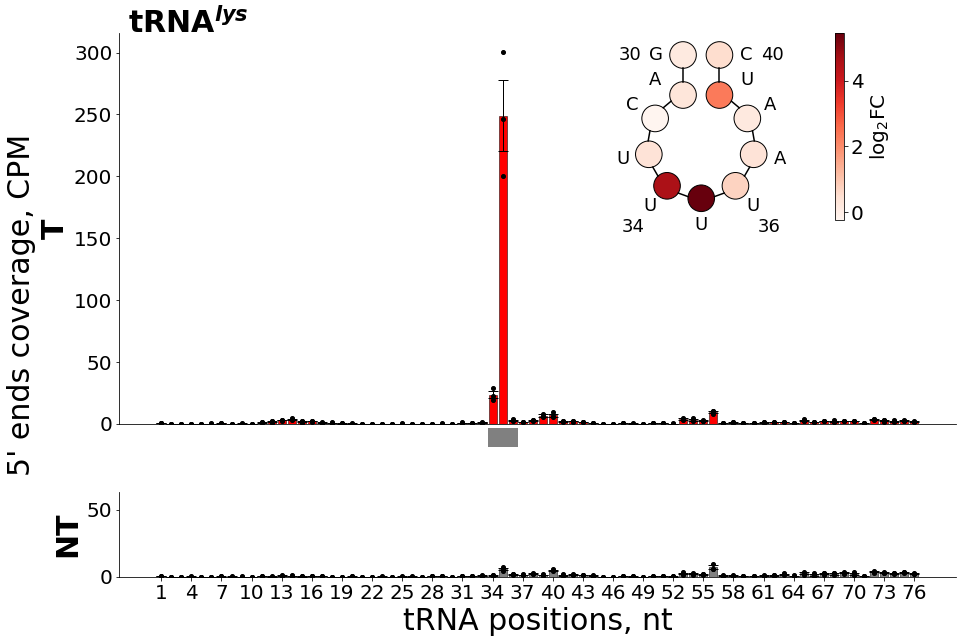

In [6]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.bf'] = 'Arial:italic:bold'

figure = plt.figure(figsize=(15,10))
grid = plt.GridSpec(11, 11, wspace=0.2, hspace=0.5)

lysT_TCS_t_plot = figure.add_subplot(grid[0:8, 0:11])
lysT_TCS_nt_plot = figure.add_subplot(grid[9:11, 0:11])
lysT_TCS_invisible_plot = figure.add_subplot(grid[0:11, 0:11], frameon=False)

WT_T_columns = ["IJ01_S1", "IJ02_S2", "IJ03_S3"]
WT_NT_columns = ["IJ04_S4", "IJ05_S5", "IJ06_S6"]

ylim = draw_t_nt_barplot_nc(tcs_df=lysT_TCS_df, 
                     T_columns=WT_T_columns,
                     NT_columns=WT_NT_columns,
                     t_subplot=lysT_TCS_t_plot, 
                     nt_subplot=lysT_TCS_nt_plot, 
                     invisible_subplot=lysT_TCS_invisible_plot, label="tRNA$^{\mathbf{lys}}$", 
                     f=3, 
                     nt_scale=5,
                     xlabel="tRNA positions, nt")

AC_start = 34
AC_end = 36
rectangle_h = ylim[1]/20
AC_rectangle = Rectangle((AC_start-0.5, -rectangle_h*1.2), 3, rectangle_h, clip_on=False, facecolor="grey")
lysT_TCS_t_plot.add_patch(AC_rectangle)

tRNA_AC_subplot = figure.add_subplot(grid[0:4, 6:10])

aveLogFC_values = lysT_TCS_df[lysT_TCS_df["Pos"].isin(np.arange(30, 41))].sort_values(by="Pos")["aveLogFC"].tolist()
cmap = cm.Reds
norm = colors.Normalize(vmin=min(aveLogFC_values), vmax=max(aveLogFC_values))
colors_array = [cmap(norm(x)) for x in aveLogFC_values]

tRNA_AC_stemloop_pos = ["30", "", "", "", "34", "", "36", "", "", "", "40"]
tRNA_AC_stemloop_letters = lysT_TCS_df[lysT_TCS_df["Pos"].isin(np.arange(30, 41))]["Letter"].tolist()

draw_tRNA_AC_loop(a=0, b=0, R=2, r=0.5, plot=tRNA_AC_subplot, 
                  colors_array=colors_array, 
                  labels_array=tRNA_AC_stemloop_pos, 
                  letters_array=tRNA_AC_stemloop_letters)

colorbar_settings = cm.ScalarMappable(norm=norm, cmap=cmap)
colorbar_settings.set_array(aveLogFC_values)

cbar = figure.colorbar(colorbar_settings)
cbar.set_label("log$_2$FC", size=20)
cbar.ax.tick_params(labelsize=20)

# figure.savefig("Drafts/Final_pictures_20_May/WT_lysT_Reds_SEM" + date_suffix + ".png", bbox_inches = "tight", dpi=200)
# figure.savefig("Drafts/Final_pictures_20_May/WT_lysT_Reds_SEM" + date_suffix + ".svg", bbox_inches = "tight", dpi=200)

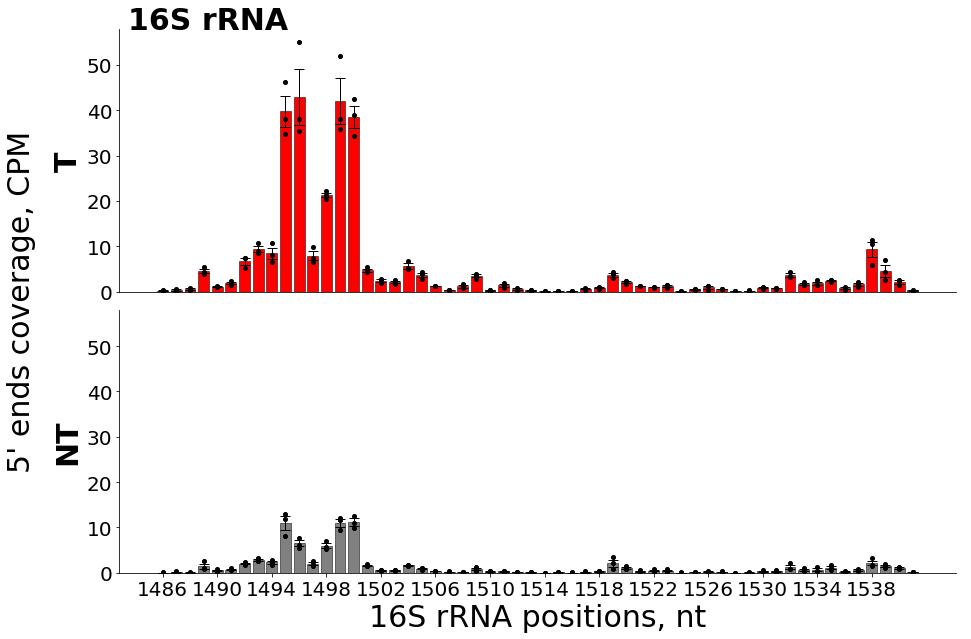

In [10]:
figure = plt.figure(figsize=(15,10))
grid = plt.GridSpec(10, 1, wspace=0.2, hspace=0.5)

rrsH_TCS_t_plot = figure.add_subplot(grid[0:5, 0:1])
rrsH_TCS_nt_plot = figure.add_subplot(grid[5:10, 0:1])
rrsH_TCS_invisible_plot = figure.add_subplot(grid[0:10, 0:1], frameon=False)

WT_T_columns = ["IJ01_S1", "IJ02_S2", "IJ03_S3"]
WT_NT_columns = ["IJ04_S4", "IJ05_S5", "IJ06_S6"]

draw_t_nt_barplot_nc(tcs_df=rrsH_TCS_df, 
                     T_columns=WT_T_columns,
                     NT_columns=WT_NT_columns,
                     t_subplot=rrsH_TCS_t_plot, 
                     nt_subplot=rrsH_TCS_nt_plot, 
                     invisible_subplot=rrsH_TCS_invisible_plot,
                     f=4, 
                     nt_scale=1, 
                     label="16S rRNA", xlabel="16S rRNA positions, nt")

figure.savefig("Results/Pictures/Ecd10LVM_rrsH_SEM.png", bbox_inches = "tight", dpi=200)
figure.savefig("Results/Pictures/Ecd10LVM_rrsH_SEM.svg", bbox_inches = "tight", dpi=200)

In [19]:
d10LVM_lysT_TCS_df = pd.read_csv("LshCas13a_d10LVM_data/Results/Tables/tRNA_tables/14-tRNA-Lys_34_35_36.tsv", sep="\t")

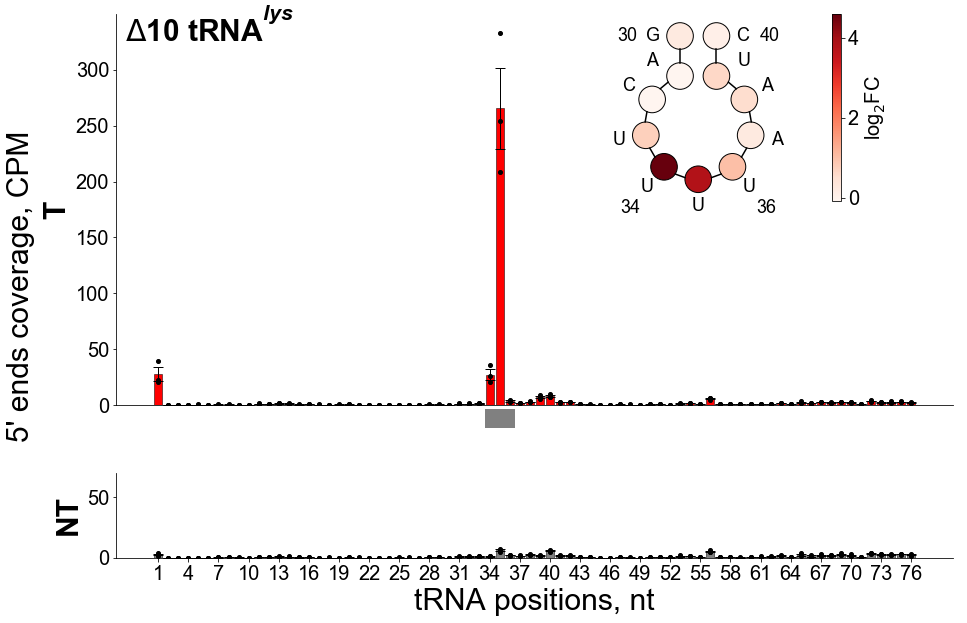

In [21]:
plt.rcParams['font.family'] = 'Arial'

figure = plt.figure(figsize=(15,10))
grid = plt.GridSpec(11, 11, wspace=0.2, hspace=0.5)

lysT_TCS_t_plot = figure.add_subplot(grid[0:8, 0:11])
lysT_TCS_nt_plot = figure.add_subplot(grid[9:11, 0:11])
lysT_TCS_invisible_plot = figure.add_subplot(grid[0:11, 0:11], frameon=False)

d10LVM_T_columns = ["IJ01_S1", "IJ02_S2", "IJ03_S3"]
d10LVM_NT_columns = ["IJ04_S4", "IJ05_S5", "IJ06_S6"]

ylim = draw_t_nt_barplot_nc(tcs_df=d10LVM_lysT_TCS_df, 
                     T_columns=d10LVM_T_columns,
                     NT_columns=d10LVM_NT_columns,
                     t_subplot=lysT_TCS_t_plot, 
                     nt_subplot=lysT_TCS_nt_plot, 
                     invisible_subplot=lysT_TCS_invisible_plot, label="$\Delta$10 tRNA$^{\mathbf{lys}}$", 
                     f=3, 
                     nt_scale=5,
                     xlabel="tRNA positions, nt")

AC_start = 34
AC_end = 36
rectangle_h = ylim[1]/20
AC_rectangle = Rectangle((AC_start-0.5, -rectangle_h*1.2), 3, rectangle_h, clip_on=False, facecolor="grey")
lysT_TCS_t_plot.add_patch(AC_rectangle)

tRNA_AC_subplot = figure.add_subplot(grid[0:4, 6:10])

aveLogFC_values = lysT_TCS_df[lysT_TCS_df["Pos"].isin(np.arange(30, 41))].sort_values(by="Pos")["aveLogFC"].tolist()
cmap = cm.Reds
norm = colors.Normalize(vmin=min(aveLogFC_values), vmax=max(aveLogFC_values))
colors_array = [cmap(norm(x)) for x in aveLogFC_values]

tRNA_labels = ["30", "", "", "", "34", "", "36", "", "", "", "40"]
tRNA_AC_stemloop_letters = d10LVM_lysT_TCS_df[d10LVM_lysT_TCS_df["Pos"].isin(np.arange(30, 41))]["Letter"].tolist()

draw_tRNA_AC_loop(a=0, b=0, R=1, r=0.25, plot=tRNA_AC_subplot, 
                  colors_array=colors_array, 
                  labels_array=tRNA_labels, letters_array=tRNA_AC_stemloop_letters)

colorbar_settings = cm.ScalarMappable(norm=norm, cmap=cmap)
colorbar_settings.set_array(aveLogFC_values)

cbar = figure.colorbar(colorbar_settings)
cbar.set_label("log$_2$FC", size=20)
cbar.ax.tick_params(labelsize=20)

figure.savefig("Drafts/Final_pictures_20_May/d10LVM_lysT_Reds_SEM" + date_suffix + ".png", bbox_inches = "tight", dpi=200)
figure.savefig("Drafts/Final_pictures_20_May/d10LVM_lysT_Reds_SEM" + date_suffix + ".svg", bbox_inches = "tight", dpi=200)

In [83]:
date_suffix

'_11_5_2020'